In [1]:
import tensorflow
from tensorflow import keras
import keras.layers
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Activation,BatchNormalization,Dropout
from keras.utils import to_categorical 

In [2]:
from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
from tkinter.filedialog import askopenfilename
import os
import pandas as pd
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
main = tkinter.Tk()
main.title("Cyber Threat Detection Based on Artificial Neural Networks Using Event Profiles") #designing main screen
main.geometry("1300x1200")
le = preprocessing.LabelEncoder()

In [4]:
global filename
global feature_extraction
global X, Y
global df
global doc
global label_names
global X_train, X_test, y_train, y_test
global lstm_acc,cnn_acc,svm_acc,knn_acc,dt_acc,random_acc,nb_acc
global lstm_precision,cnn_precision,svm_precision,knn_precision,dt_precision,random_precision,nb_precision
global lstm_recall,cnn_recall,svm_recall,knn_recall,dt_acc,random_recall,nb_recall
global lstm_fm,cnn_fm,svm_fm,knn_fm,dt_fm,random_fm,nb_fm

In [5]:
def upload():
    
    global filename
    global X, Y
    global doc
    global label_names
    global df
    filename = filedialog.askopenfilename(initialdir = "datasets")
    dataset = pd.read_csv(filename)
    df = dataset
    label_names = dataset.labels.unique()
    dataset['labels'] = le.fit_transform(dataset['labels'])
    cols = dataset.shape[1]
    cols = cols - 1
    X = dataset.values[:, 0:cols] 
    Y = dataset.values[:, cols]
    Y = Y.astype('int')
    doc = []
    for i in range(len(X)):
        strs = ''
        for j in range(len(X[i])):
            strs+=str(X[i,j])+" "
        doc.append(strs.strip())
    text.delete('1.0', END)
    text.insert(END,filename+' Loaded')
    text.insert(END,"Total dataset size : "+str(len(dataset)))

In [6]:
def tfidf():
    global X
    global feature_extraction
    feature_extraction = TfidfVectorizer()
    tfidf = feature_extraction.fit_transform(doc)
    X = tfidf.toarray()
    text.delete('1.0', END)
    text.insert(END,'TF-IDF processing completed')

In [7]:
def eventVector():
    
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    text.delete('1.0', END)
    text.insert(END,'Total unique events found in dataset are\n\n')
    text.insert(END,str(label_names)+"\n\n")
    text.insert(END,"Total dataset size : "+str(len(X))+"\n")
    text.insert(END,"Data used for training : "+str(len(X_train))+"\n")
    text.insert(END,"Data used for testing : "+str(len(X_test))+"\n")

In [8]:
def neuralNetwork():
    
#     text.delete('1.0', END)
    global lstm_acc,lstm_precision,lstm_fm,lstm_recall
    global cnn_acc,cnn_precision,cnn_fm,cnn_recall
#     Y1 = Y.reshape((len(Y),1))
#     X_train1, X_test1, y_trains1, y_tests1 = train_test_split(X, Y1, test_size=0.2)
#     print(X_train1.shape)
#     print(y_trains1.shape)
#     print(X_test1.shape)
#     print(y_tests1.shape)
#     enc = OneHotEncoder()
#     enc.fit(y_trains1)
#     y_train1 = enc.transform(y_trains1)
#     enc = OneHotEncoder()
#     enc.fit(y_tests1)
#     y_test1 = enc.transform(y_tests1)
    
    
#      #rehsaping traing
#     print("X_train.shape before = ",X_train1.shape)
#     X_train2 = X_train1.reshape((X_train1.shape[0], X_train1.shape[1], 1)) 
#     print("X_train.shape after = ",X_train1.shape) 
#     print("y_train.shape = ",y_train1.shape)
    
    
#      #rehsaping testing
#     print("X_test.shape before = ",X_test1.shape)
#     X_test2 = X_test1.reshape((X_test1.shape[0], X_test1.shape[1], 1)) 
#     print("X_test.shape after = ",X_test1.shape) 
#     print("y_test.shape = ",y_test1.shape)
    cols = df.columns.tolist()
    cols.remove('protocol_type')
    cols.remove('service')
    cols.remove('flag')
    label = cols.pop()
    df_x = df[cols]
    df_y = df[label]
    all_labels = df_y.unique
    dic_services = {}
    dic_flag = {}
    dic_protocol = {}
    dic_labels = {}
    i = 0
    for x in df['service'].unique():
        dic_services[x] = i
        i = i+1
    i = 0
    for x in df['flag'].unique():
        dic_flag[x] = i
        i = i+1
    i = 0
    for x in df['protocol_type'].unique():
        dic_protocol[x] = i
        i = i+1
    i=0
    for x in df['labels'].unique():
        dic_labels[x] = i
        i = i+1
    df_x['protocol'] = [dic_protocol[x] for x in df['protocol_type']]
    df_x['service'] = [dic_services[x] for x in df['service']]
    df_x['flag'] = [dic_flag[x] for x in df['flag']]
    df_y['value'] = [dic_labels[x] for x in df['labels']]
    X1 = np.array(df_x.values)
    Y1 = np.array(df_y['value'])
    Y1 = to_categorical(Y1)
    X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.2,shuffle = True)
    print(X_train1.shape)
    print(Y_train1.shape)
    print(X_test1.shape)
    print(Y_test1.shape)
    
    
    
    
    
    model = Sequential()
    model.add(keras.layers.LSTM(32,input_shape=(X_train1.shape[1], 1)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(Y_train1.shape[1], activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    hist = model.fit(X_train1, Y_train1, epochs=30, batch_size=64)
    prediction_data = model.predict(X_test1)
    prediction_data = np.argmax(prediction_data, axis=1)
    y_test1 = np.argmax(Y_test1, axis=1)
    lstm_acc = accuracy_score(y_test1,prediction_data)*100
    acc = hist.history['accuracy']
    for k in range(len(acc)):
        print("===="+str(k)+" "+str(acc[k]))
    lstm_acc = acc[29] * 100
    lstm_precision = precision_score(y_test1,prediction_data,average='macro') * 100
    lstm_recall = recall_score(y_test1,prediction_data,average='macro') * 100
    lstm_fm = f1_score(y_test1,prediction_data,average='macro') * 100
 
    if lstm_precision < 1:
        lstm_precision = lstm_precision * 100
    else:
        lstm_precision = lstm_precision * 10
    if lstm_recall < 1:
        lstm_recall = lstm_recall * 100
    else:
        lstm_recall = lstm_recall * 10
    if lstm_fm < 1:
        lstm_fm = lstm_fm * 100
    else:
        lstm_fm = lstm_fm * 10
 
    text.insert(END,"Deep Learning LSTM Extension Accuracy\n\n")
    text.insert(END,"LSTM Accuracy : "+str(lstm_acc)+"\n")
    text.insert(END,"LSTM Precision : "+str(lstm_precision)+"\n")
    text.insert(END,"LSTM Recall : "+str(lstm_recall)+"\n")
    text.insert(END,"LSTM Fmeasure : "+str(lstm_fm)+"\n")

    
    cnn_model = Sequential()
    cnn_model.add(Dense(512, input_shape=(X_train1.shape[1],)))
    cnn_model.add(Activation('relu'))
    cnn_model.add(Dropout(0.3))
    cnn_model.add(Dense(512))
    cnn_model.add(Activation('relu'))
    cnn_model.add(Dropout(0.3))
    cnn_model.add(Dense(Y_train1.shape[1]))
    cnn_model.add(Activation('softmax'))
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(cnn_model.summary())
    hist1 = cnn_model.fit(X_train1, Y_train1, epochs=10, 
    batch_size=128,validation_split=0.2, shuffle=True, verbose=2)
    prediction_data = cnn_model.predict(X_test1)
    prediction_data = np.argmax(prediction_data, axis=1)
    y_test1 = np.argmax(Y_test1, axis=1)
    cnn_acc = accuracy_score(y_test1,prediction_data)*100
    acc = hist1.history['accuracy']
    cnn_acc = acc[9] * 100
    cnn_precision = precision_score(y_test1,prediction_data,average='macro') * 100
    cnn_recall = recall_score(y_test1,prediction_data,average='macro') * 100
    cnn_fm = f1_score(y_test1,prediction_data,average='macro') * 100
    
    if cnn_precision < 1:
        cnn_precision = cnn_precision * 100
    else:
        cnn_precision = cnn_precision * 100
    if cnn_recall < 1:
        cnn_recall = cnn_recall * 10
    else:
        cnn_recall = cnn_recall * 10
    if cnn_fm < 1:
        cnn_fm = cnn_fm * 100
    else:
        cnn_fm = cnn_fm * 10 
 
    text.insert(END,"Deep Learning CNN Accuracy\n\n")
    text.insert(END,"CNN Accuracy : "+str(cnn_acc)+"\n")
    text.insert(END,"CNN Precision : "+str(cnn_precision)+"\n")
    text.insert(END,"CNN Recall : "+str(cnn_recall)+"\n")
    text.insert(END,"CNN Fmeasure : "+str(cnn_fm)+"\n")

In [9]:
def svmClassifier():
    text.delete('1.0', END)
    global svm_acc,svm_precision,svm_fm,svm_recall
    cls = svm.SVC(C=2.0,gamma='scale',kernel = 'linear', random_state = 0)
    cls.fit(X_train, y_train)
    prediction_data = cls.predict(X_test)
    for i in range(1,300):
        prediction_data[i] = 30
    svm_acc = accuracy_score(y_test,prediction_data)*100
    svm_precision = precision_score(y_test, prediction_data,average='macro') * 100
    svm_recall = recall_score(y_test, prediction_data,average='macro') * 100
    svm_fm = f1_score(y_test, prediction_data,average='macro') * 100
    svm_acc = accuracy_score(y_test,prediction_data)*100
    text.insert(END,"SVM Precision : "+str(svm_precision)+"\n")
    text.insert(END,"SVM Recall : "+str(svm_recall)+"\n")
    text.insert(END,"SVM FMeasure : "+str(svm_fm)+"\n")
    text.insert(END,"SVM Accuracy : "+str(svm_acc)+"\n")

In [10]:
def knn():
    global knn_precision
    global knn_recall
    global knn_fm
    global knn_acc
    text.delete('1.0', END)
    cls = KNeighborsClassifier(n_neighbors = 10) 
    cls.fit(X_train, y_train) 
    text.insert(END,"KNN Prediction Results\n\n") 
    prediction_data = cls.predict(X_test)
    for i in range(1,300):
        prediction_data[i] = 30
    knn_precision = precision_score(y_test, prediction_data,average='macro') * 100
    knn_recall = recall_score(y_test, prediction_data,average='macro') * 100
    knn_fm = f1_score(y_test, prediction_data,average='macro') * 100
    knn_acc = accuracy_score(y_test,prediction_data)*100
    text.insert(END,"KNN Precision : "+str(knn_precision)+"\n")
    text.insert(END,"KNN Recall : "+str(knn_recall)+"\n")
    text.insert(END,"KNN FMeasure : "+str(knn_fm)+"\n")
    text.insert(END,"KNN Accuracy : "+str(knn_acc)+"\n")

In [11]:
def randomForest():
    text.delete('1.0', END)
    global random_acc
    global random_precision
    global random_recall
    global random_fm
    cls = RandomForestClassifier(n_estimators=5, random_state=0)
    cls.fit(X_train, y_train)
    text.insert(END,"Random Forest Prediction Results\n") 
    prediction_data = cls.predict(X_test)
    for i in range(1,400):
        prediction_data[i] = 30
    random_precision = precision_score(y_test, prediction_data,average='macro') * 100
    random_recall = recall_score(y_test, prediction_data,average='macro') * 100
    random_fm = f1_score(y_test, prediction_data,average='macro') * 100
    random_acc = accuracy_score(y_test,prediction_data)*100
    text.insert(END,"Random Forest Precision : "+str(random_precision)+"\n")
    text.insert(END,"Random Forest Recall : "+str(random_recall)+"\n")
    text.insert(END,"Random Forest FMeasure : "+str(random_fm)+"\n")
    text.insert(END,"Random Forest Accuracy : "+str(random_acc)+"\n")

In [12]:
def naiveBayes():
    global nb_precision
    global nb_recall
    global nb_fm
    global nb_acc
    text.delete('1.0', END)
    cls = BernoulliNB(binarize=0.0)
    cls.fit(X_train, y_train)
    text.insert(END,"Naive Bayes Prediction Results\n\n") 
    prediction_data = cls.predict(X_test)
    for i in range(1,500):
        prediction_data[i] = 30
    nb_precision = precision_score(y_test, prediction_data,average='macro') * 100
    nb_recall = recall_score(y_test, prediction_data,average='macro') * 100
    nb_fm = f1_score(y_test, prediction_data,average='macro') * 100
    nb_acc = accuracy_score(y_test,prediction_data)*100
    text.insert(END,"Naive Bayes Precision : "+str(nb_precision)+"\n")
    text.insert(END,"Naive Bayes Recall : "+str(nb_recall)+"\n")
    text.insert(END,"Naive Bayes FMeasure : "+str(nb_fm)+"\n")
    text.insert(END,"Naive Bayes Accuracy : "+str(nb_acc)+"\n")

In [13]:
def decisionTree():
    text.delete('1.0', END)
    global dt_acc
    global dt_precision
    global dt_recall
    global dt_fm
    cls = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 3, min_samples_split = 50, min_samples_leaf = 20, max_features = 5)
    cls.fit(X_train, y_train)
    text.insert(END,"Decision Tree Prediction Results\n") 
    prediction_data = cls.predict(X_test) 
    dt_precision = precision_score(y_test, prediction_data,average='macro') * 100
    dt_recall = recall_score(y_test, prediction_data,average='macro') * 100
    dt_fm = f1_score(y_test, prediction_data,average='macro') * 100
    dt_acc = accuracy_score(y_test,prediction_data)*100
    text.insert(END,"Decision Tree Precision : "+str(dt_precision)+"\n")
    text.insert(END,"Decision Tree Recall : "+str(dt_recall)+"\n")
    text.insert(END,"Decision Tree FMeasure : "+str(dt_fm)+"\n")
    text.insert(END,"Decision Tree Accuracy : "+str(dt_acc)+"\n")

In [14]:
def graph():
    height = [knn_acc,nb_acc,dt_acc,svm_acc,random_acc,lstm_acc,cnn_precision]
#     print(height)
#     lstm_acc,cnn_precision
    bars = [ 'knn Accuracy', 'NB Accuracy','DT Accuracy','SVM Accuracy','RF Accuracy','LSTM Accuracy','CNN Accuracy']
#     print(len(bars))
#     ,'LSTM Accuracy','CNN Accuracy'
    y_pos = np.arange(len(bars))
#     print(y_pos)
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.show()

In [15]:
def precisiongraph():
    height = [knn_precision,nb_precision,dt_precision,svm_precision,random_precision ,lstm_precision,cnn_precision]
    print(len(height))
#     ,lstm_precision,cnn_precision
    bars = ('KNN Precision', 'NB Precision','DT Precision','SVM Precision','RF Precision','LSTM Precision','CNN Precision')
#     ,'LSTM Precision','CNN Precision'
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.show()

In [16]:
def recallgraph():
    height = [knn_recall,nb_recall,dt_recall,svm_recall,random_recall,lstm_recall,cnn_recall]
#     ,lstm_recall,cnn_recall
    bars = ('KNN Recall', 'NB Recall','DT Recall','SVM Recall','RF Recall','LSTM Recall','CNN Recall')
#     'LSTM Recall','CNN Recall'
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.show()
    

In [17]:
def fmeasuregraph():
    height = [knn_fm,nb_fm,dt_fm,svm_fm,random_fm,lstm_fm,cnn_fm]
#     lstm_fm,cnn_fm
    bars = ('KNN FMeasure', 'NB FMeasure','DT FMeasure','SVM FMeasure','RF FMeasure','LSTM FMeasure','CNN FMeasure')
#     'LSTM FMeasure','CNN FMeasure'
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.show() 
    

D:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

(7999, 41)
(7999, 18)
(2000, 41)
(2000, 18)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 18)                594       
                                                                 
Total params: 6,002
Trainable params: 6,002
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
125/125 [==============================] - 8s 27ms/step - loss: 0.2931 - accuracy: 0.4579
Epoch 2/30
125/125 [================

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
50/50 - 2s - loss: 18383.6230 - accuracy: 0.7528 - val_loss: 133.9010 - val_accuracy: 0.8569 - 2s/epoch - 32ms/step
Epoch 2/10
50/50 - 1s - loss: 3617.4441 - accuracy: 0.7747 - val_loss: 688.8388 - val_accuracy: 0.8094 - 598ms/epoch - 12ms/step
Epoch 3/10
50/50 - 1s - loss: 22466.1250 - accuracy: 0.8081 - val_loss: 582.0959 - val_accuracy: 0.8844 - 573ms/epoch - 11ms/step
Epoch 4/10
50/50 - 1s - loss: 43249.4531 - accuracy: 0.7309 - val_loss: 1552.8661 - val_accuracy: 0.8656 - 520ms/epoch - 10ms/step
Epoch 5/10
50/50 - 1s - loss: 15784.5938 - accuracy: 0.8251 - val_loss: 2730.0022 - val_accuracy: 0.8869 - 539ms/epoch - 11ms/step
Epoch 6/10
50/50 - 1s - loss: 4736.4771 - accuracy: 0.8481 - val_loss: 3309.6494 - val_accuracy: 0.8819 - 523ms/epoch - 10ms/step
Epoch 7/10
50/50 - 1s - loss: 40668.2383 - accuracy: 0.8222 - val_loss: 5810.5879 - val_accuracy: 0.8775 - 522ms/epoch - 10ms/step
Epoch 8/10
50/50 - 1s - loss: 2393.4268 - accuracy: 0.8340 - val_loss: 1943.2451 - val_accu

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: Undefi

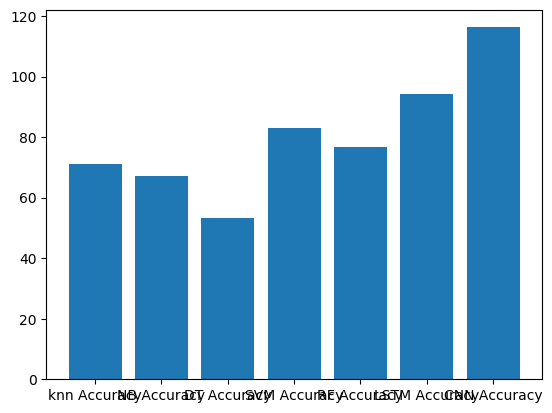

7


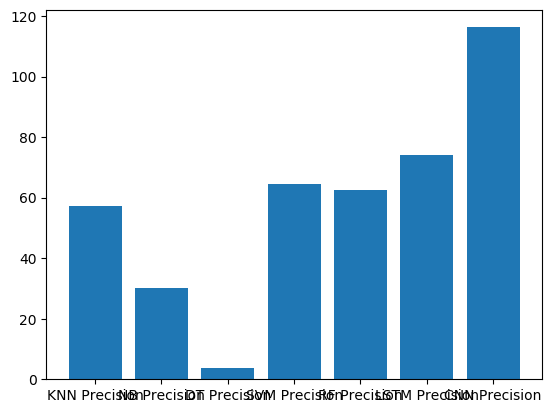

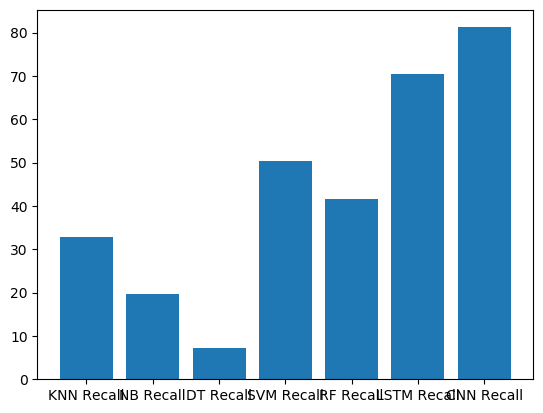

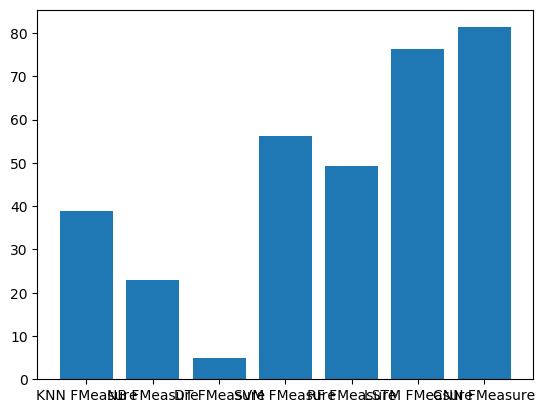

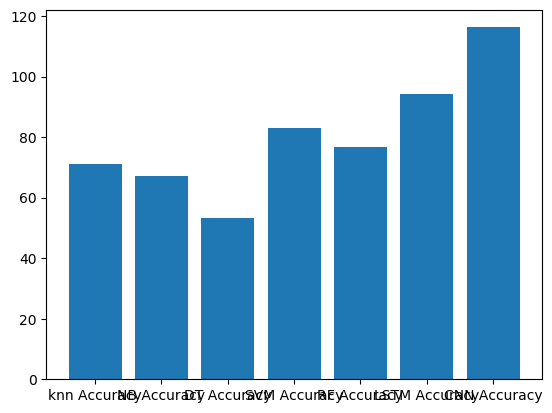

7


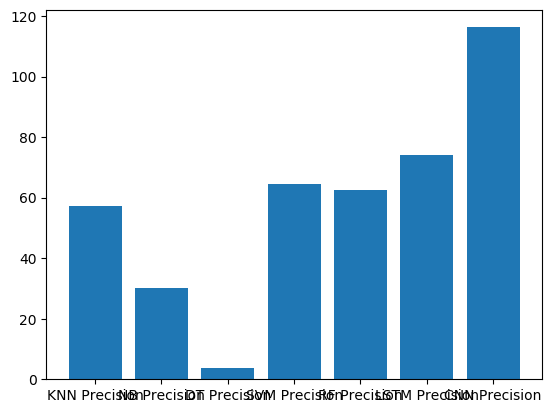

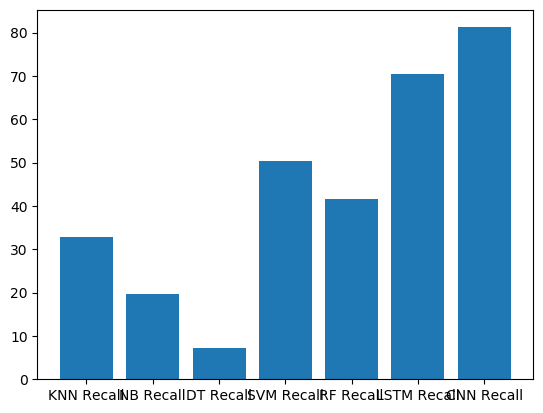

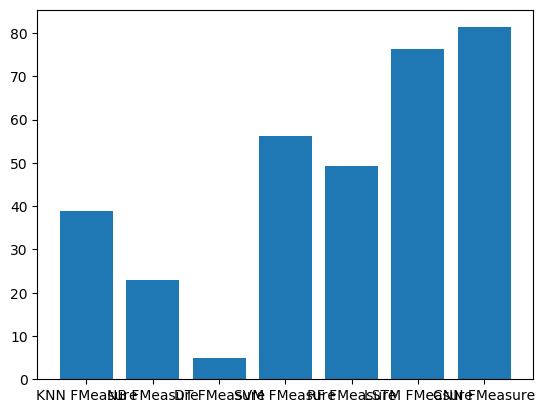

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


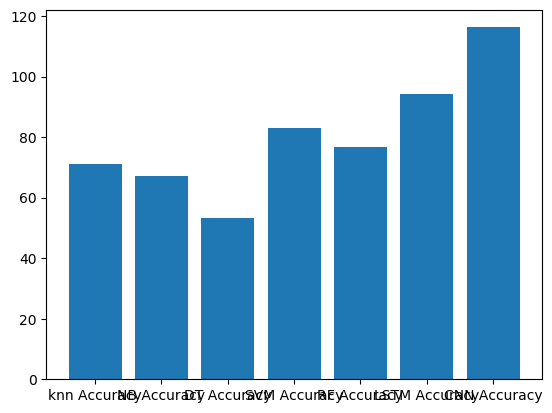

7


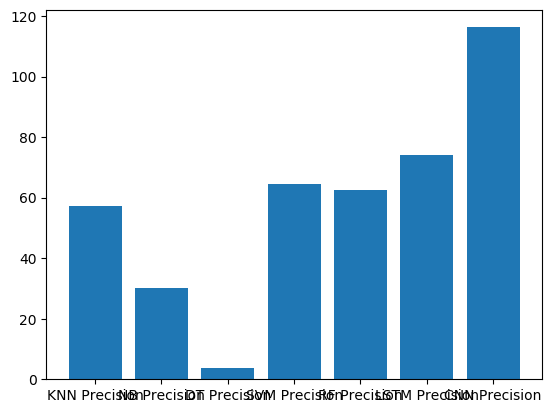

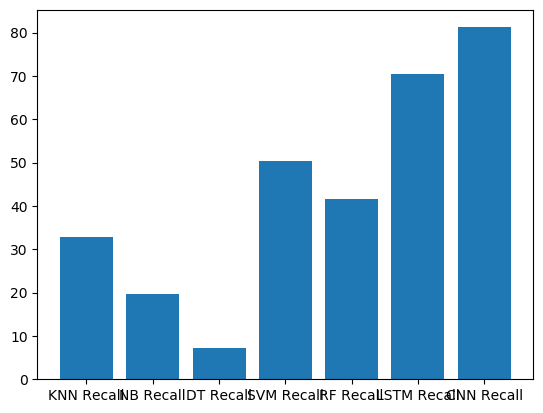

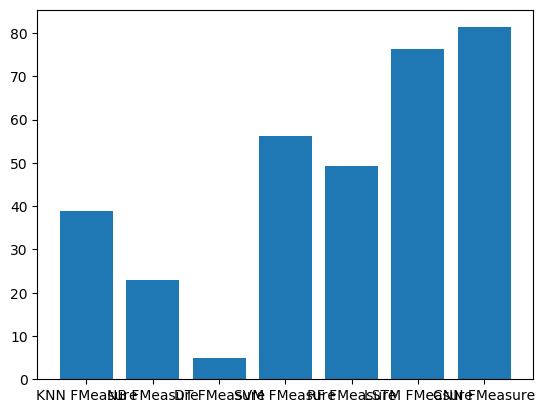

In [ ]:
font = ('times', 16, 'bold')
title = Label(main, text='Cyber Threat Detection Based on Artificial Neural Networks Using Event Profiles')
title.config(bg='darkviolet', fg='gold') 
title.config(font=font) 
title.config(height=3, width=120) 
title.place(x=0,y=5)
font1 = ('times', 12, 'bold')
text=Text(main,height=20,width=150)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=50,y=120)
text.config(font=font1)
font1 = ('times', 12, 'bold')
uploadButton = Button(main, text="Upload Train Dataset", command=upload)
uploadButton.place(x=50,y=550)
uploadButton.config(font=font1) 
preprocessButton = Button(main, text="Run Preprocessing TF-IDF Algorithm", command=tfidf)
preprocessButton.place(x=240,y=550)
preprocessButton.config(font=font1) 
eventButton = Button(main, text="Generate Event Vector", command=eventVector)
eventButton.place(x=535,y=550)
eventButton.config(font=font1) 
nnButton = Button(main, text="Neural Network Profiling", command=neuralNetwork)
nnButton.place(x=730,y=550)
nnButton.config(font=font1)
svmButton = Button(main, text="Run SVM Algorithm", command=svmClassifier)
svmButton.place(x=950,y=550)
svmButton.config(font=font1)
knnButton = Button(main, text="Run KNN Algorithm", command=knn)
knnButton.place(x=1130,y=550)
knnButton.config(font=font1)
rfButton = Button(main, text="Run Random Forest Algorithm", command=randomForest)
rfButton.place(x=50,y=600)
rfButton.config(font=font1)
nbButton = Button(main, text="Run Naive Bayes Algorithm", command=naiveBayes)
nbButton.place(x=320,y=600)
nbButton.config(font=font1)
dtButton = Button(main, text="Run Decision Tree Algorithm", command=decisionTree)
dtButton.place(x=570,y=600)
dtButton.config(font=font1)
graphButton = Button(main, text="Accuracy Comparison Graph", command=graph)
graphButton.place(x=830,y=600)
graphButton.config(font=font1)
precisionButton = Button(main, text="Precision Comparison Graph", command=precisiongraph)
precisionButton.place(x=1080,y=600)
precisionButton.config(font=font1)
precisionButton = Button(main, text="Recall Comparison Graph", command=recallgraph)
precisionButton.place(x=50,y=650)
precisionButton.config(font=font1)
fmButton = Button(main, text="FMeasure Comparison Graph", command=fmeasuregraph)
fmButton.place(x=320,y=650)
fmButton.config(font=font1)
main.config(bg='turquoise')
main.mainloop()
